In [2]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import ase
import matplotlib.pyplot as plt
from ase.io import read

import abtem

In [3]:
abtem.config.set({"device": "cpu", "fft": "fftw"})

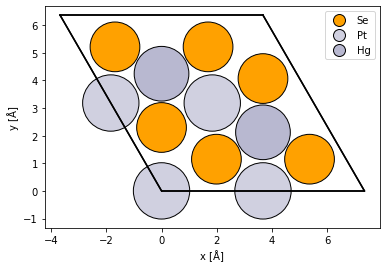

In [4]:
sio2 = read("/home/ABTLUS/victor.secco/data_processing/Banco de Dados Cristalográficos/PtHgSe_CollCode185808.cif")

abtem.show_atoms(sio2, plane="xy", legend=True);

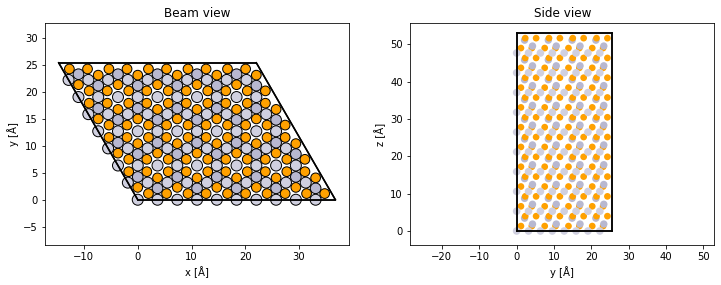

In [19]:
sio2_repeated = sio2 * (5, 4, 20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
abtem.show_atoms(sio2_repeated, ax=ax1, plane="xy", title="Beam view")
abtem.show_atoms(sio2_repeated, ax=ax2, plane="yz", title="Side view", linewidth=0);

In [31]:
frozen_phonons = abtem.FrozenPhonons(sio2_repeated, 8, sigmas=0.1)

In [33]:
potential = abtem.Potential(
    frozen_phonons,
    gpts=512,
    projection="infinite",
    slice_thickness=2,
    exit_planes=50,
)

In [34]:
wave = abtem.PlaneWave(energy=200e3)
exit_waves = wave.multislice(potential)

In [36]:
measurement_ensemble = exit_waves.diffraction_patterns(max_angle=10)

measurement_ensemble.shape

(8, 31, 103)

In [37]:
measurement = measurement_ensemble.mean(0)

measurement.compute()

[                                        ] | 0% Completed | 172.00 us

[########################################] | 100% Completed | 3.08 ss


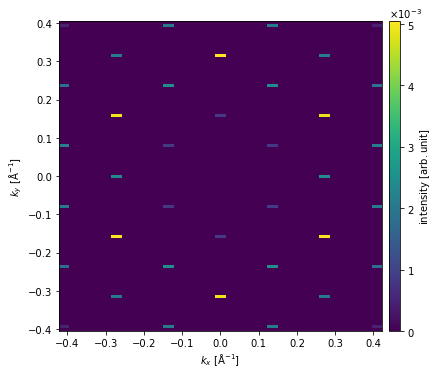

In [38]:
visualization = measurement.block_direct().show(
    explode=True,
    figsize=(18, 5),
    cbar=True,
    common_color_scale=True,
)

In [39]:
# the conventional unit cell is given here
indexed_spots = measurement.index_diffraction_spots(cell=sio2.cell)

In [41]:
indexed_spots[-1].block_direct().show(scale=0.05, figsize=(5, 5))

RuntimeError: Base axes cannot be indexed.